# For train, validation data

In [28]:
import os

import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier

import sklearn
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
x_train = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/x_train_220819.csv', index_col = 0)

In [30]:
y_train = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/y_train_220819.csv',index_col=0)

In [31]:
x_train

,Volume_total,sentiment_index_total,High,Low,Vol,RSI,SMA_5,SMA_20,SMA_60,EMA,MACD,signal,Stochastic RSI_fastk,Stochastic RSI_fastd,Stochastic Oscillator Index_slowk,Stochastic Oscillator Index_slowd
0,0.163978,0.020681,0.002918,0.000000,0.005610,0.509235,0.268272,0.267705,0.300468,0.273505,0.237320,0.242923,0.518424,0.519260,0.538468,0.543101
1,0.149226,0.135777,0.000000,0.000165,0.003568,0.509235,0.268272,0.267705,0.300468,0.273505,0.237320,0.242923,0.518424,0.519260,0.538468,0.543101
2,0.124000,0.198136,0.000832,0.001027,0.002891,0.509235,0.268272,0.267705,0.300468,0.273505,0.237320,0.242923,0.518424,0.519260,0.538468,0.543101
3,0.121332,0.174798,0.002015,0.002124,0.002923,0.509235,0.268272,0.267705,0.300468,0.273505,0.237320,0.242923,0.518424,0.519260,0.538468,0.543101
4,0.136120,0.122199,0.009661,0.003831,0.007399,0.509235,0.000000,0.267705,0.300468,0.273505,0.237320,0.242923,0.518424,0.519260,0.538468,0.543101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,0.113974,0.259076,0.910801,0.909599,0.003176,0.529008,0.917457,0.990534,0.964958,0.969428,0.364338,0.513688,1.000000,0.666667,0.476249,0.245136
1312,0.536890,0.253461,0.910345,0.922018,0.002427,0.526038,0.922188,0.993780,0.973975,0.972004,0.361761,0.488486,0.976137,0.992046,0.726398,0.471750
1313,0.549279,0.251991,0.942340,0.926266,0.004857,0.572567,0.941255,0.996351,0.982595,0.980400,0.380129,0.472593,1.000000,0.992046,0.844886,0.692859
1314,0.520025,0.248470,0.958848,0.963925,0.003785,0.599612,0.968100,0.999094,0.991295,0.991194,0.406410,0.465986,1.000000,0.992046,0.888953,0.836160


# For test data

In [32]:
#scale까지 완료한 test data load
test_data_scale = pd.read_csv('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/DATA_Bitcoin_ML/testdata_220819.csv',index_col = 0)
test_data_scale

,Volume_total,sentiment_index_total,High,Low,Vol,RSI,SMA_5,SMA_20,SMA_60,EMA,MACD,signal,Stochastic RSI_fastk,Stochastic RSI_fastd,Stochastic Oscillator Index_slowk,Stochastic Oscillator Index_slowd,Fluctuations
0,0.545000,0.195338,0.959518,0.980993,0.002937,0.597561,0.991824,1.001365,1.009106,1.007050,0.436198,0.466803,0.972114,0.989451,0.858229,0.901095,0
1,0.585140,0.239189,0.971860,0.988536,0.003102,0.604627,1.003399,0.999281,1.018160,1.013699,0.445752,0.470496,1.000000,0.989451,0.803497,0.871422,1
2,0.537338,0.261605,0.965686,0.960906,0.002922,0.527532,1.001395,0.997352,1.025831,1.012624,0.427793,0.469277,0.000000,0.657371,0.519993,0.739452,0
3,0.498165,0.284602,0.943563,0.953181,0.002353,0.562177,0.999335,0.999615,1.033139,1.015618,0.424889,0.467627,0.449382,0.483127,0.404208,0.581804,1
4,0.521225,0.240861,0.956106,0.959773,0.002201,0.585381,1.000163,1.001591,1.040965,1.020763,0.429689,0.467423,0.750362,0.399915,0.371906,0.431945,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,0.604923,-0.000763,0.619732,0.561479,0.008440,0.385186,0.629822,0.711181,0.809156,0.674852,0.091733,0.163752,1.000000,0.632657,0.406729,0.215167,1
325,0.362027,0.097440,0.625358,0.626757,0.003665,0.426774,0.632902,0.709112,0.805078,0.674742,0.097517,0.147132,1.000000,0.763958,0.591088,0.384335,1
326,0.327240,0.149952,0.632318,0.637323,0.001580,0.422939,0.640462,0.706033,0.802081,0.674333,0.102285,0.134943,0.961115,0.987038,0.819918,0.613067,0
327,0.375777,0.093268,0.627981,0.609392,0.002794,0.367167,0.638447,0.700260,0.798961,0.669151,0.090336,0.122416,0.395550,0.785555,0.779561,0.742524,0


In [33]:
features = test_data_scale[['Volume_total','sentiment_index_total','High','Low','Vol',
                        'RSI','SMA_5','SMA_20','SMA_60','EMA','MACD','signal','Stochastic RSI_fastk',
                        'Stochastic RSI_fastd','Stochastic Oscillator Index_slowk','Stochastic Oscillator Index_slowd',]]
label= list(test_data_scale['Fluctuations'])

In [34]:
x_test = features
y_test = np.array(label)

# SVM modeling

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

#model train 
# param_grid = {
#     'gamma': [1] #0.1, 10, 100
# }

svm_origin = LinearSVC() #gridsearch 사용할 때 svm_origin으로 변수명 변경
n_estimators = 10
n_jobs = 2

svm = BaggingClassifier(base_estimator=svm_origin,
                          n_estimators=n_estimators,
                          max_samples=1./n_estimators,
                          n_jobs=n_jobs, verbose=3).fit(x_train, y_train)

# svm = GridSearchCV(svm_origin, param_grid = param_grid, cv = 5, n_jobs = -1, verbose = 3).fit(x_train, y_train)

C:\Users\DSSAL\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.8s finished


In [36]:
svm.set_params()

BaggingClassifier(base_estimator=LinearSVC(), max_samples=0.1, n_jobs=2,
                  verbose=3)

In [37]:
svm_pred = svm.predict(x_test)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


In [38]:
print("Test Accuracy: %f" % accuracy_score(y_test, svm_pred))

Test Accuracy: 0.784195


# Results Summary

Text(0.5, 257.44, 'Predicted label')

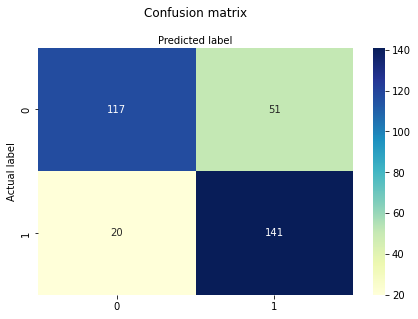

In [44]:
cnf_matrix = metrics.confusion_matrix(y_test, svm_pred)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [45]:
print("Accuracy:",metrics.accuracy_score(y_test, svm_pred))
print("Precision:",metrics.precision_score(y_test, svm_pred))
print("Recall:",metrics.recall_score(y_test, svm_pred))
print("F1score:",metrics.f1_score(y_test, svm_pred))

Accuracy: 0.78419452887538
Precision: 0.734375
Recall: 0.8757763975155279
F1score: 0.7988668555240793


In [46]:
import joblib #수정해야함

# 모델 저장
joblib.dump(svm, 'C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/Bitcoin_result_revision/svm_bitcoin_sent.pkl')

# 모델 불러오기
svm_model = joblib.load('C:/Users/DSSAL/Downloads/Fintech_Bitcoin/220401_meeting_ver/Bitcoin_result_revision/svm_bitcoin_sent.pkl')

In [47]:
svm_model

BaggingClassifier(base_estimator=LinearSVC(), max_samples=0.1, n_jobs=2,
                  verbose=3)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = svm_model.predict(x_test)
predictions = [value for value in y_pred]

accuracy_score(y_test, predictions)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


0.78419452887538

In [49]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, target_names=['class low', 'class high'], output_dict=True)
df = pd.DataFrame(report).transpose()

df

,precision,recall,f1-score,support
class low,0.854015,0.696429,0.767213,168.000000
class high,0.734375,0.875776,0.798867,161.000000
accuracy,0.784195,0.784195,0.784195,0.784195
macro avg,0.794195,0.786102,0.783040,329.000000
weighted avg,0.795468,0.784195,0.782703,329.000000


# AUCROC curve

In [50]:
from sklearn.metrics import roc_curve
svm = svm_model
# 레이블 값이 1일 때 예측 확률 추출
svm_pred_proba_class_1 = svm.predict_proba(x_test)[:,1]
svm_pred_proba_class_1

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished


array([0.9, 0.9, 0. , 0.5, 1. , 0.2, 0.1, 1. , 1. , 0.6, 0.8, 0.1, 0.2,
       0.5, 0.5, 0.5, 0.4, 0.5, 0.5, 0.5, 0.5, 1. , 1. , 0.8, 0.7, 0.8,
       0.8, 0.6, 0.8, 0.1, 1. , 0.9, 0.9, 0.9, 0.5, 0.1, 0.6, 0.5, 0.5,
       0.5, 0.5, 0.5, 0.5, 0.5, 0.6, 1. , 0.7, 0.6, 0.6, 0.9, 0.8, 0.8,
       0.8, 0.1, 0.4, 0.9, 1. , 0.8, 0.8, 0.8, 0.3, 0.1, 0.6, 0.5, 0.5,
       1. , 1. , 0.8, 0.5, 1. , 1. , 0.8, 0.5, 0.1, 0.4, 0.5, 0.5, 0.5,
       0.7, 1. , 1. , 0.1, 0.4, 1. , 1. , 0.8, 0.7, 0. , 0.4, 1. , 1. ,
       0. , 0.5, 0.5, 0.2, 1. , 0.9, 0.9, 0.1, 0.1, 0.5, 0.5, 0.5, 0.6,
       0.9, 0.3, 0.3, 1. , 1. , 0.9, 0.8, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9,
       0.1, 0. , 0.4, 0.6, 0.8, 1. , 0.9, 0.9, 0.5, 0.9, 0.2, 0.2, 0.2,
       1. , 0.7, 0.5, 0.2, 0.2, 0.6, 0.8, 1. , 0.8, 0.8, 0.7, 0. , 0.6,
       0.3, 0.7, 1. , 0.8, 0.1, 0.3, 1. , 1. , 0.9, 0.8, 0.9, 0.9, 0. ,
       0.1, 0.5, 0.5, 0.7, 1. , 0.3, 1. , 1. , 0.7, 0.6, 1. , 0. , 0.1,
       0.5, 1. , 1. , 0.7, 0.6, 0.3, 0.1, 0.4, 0.8, 1. , 1. , 0.

In [51]:
fprs, tprs, thresholds = roc_curve(y_test, svm_pred_proba_class_1)

# 반환된 임곗값 배열에서 샘플로 데이터 추출
# thresholds[0]은 max(예측확률)+1 값이 임의로 지정됨.

thr_index = np.arange(1, thresholds.shape[0])

pd.DataFrame({'index':thr_index,
             'FPR':fprs[thr_index],
             'TPR':tprs[thr_index]})

,index,FPR,TPR
0,1,0.041667,0.434783
1,2,0.071429,0.571429
2,3,0.154762,0.745342
3,4,0.238095,0.795031
4,5,0.303571,0.875776
5,6,0.523810,0.962733
6,7,0.595238,0.987578
7,8,0.666667,1.000000
8,9,0.750000,1.000000
9,10,0.922619,1.000000


In [52]:
import matplotlib.pyplot as plt

def roc_curve_plot(y_test, pred_proba_c1):
    # 임계값에 따른 FPR, TPR 값
    fprs, tprs, thresholds = roc_curve(y_test, pred_proba_c1)
    # ROC 곡선을 시각화
    plt.plot(fprs, tprs, label='ROC')
    # 가운데 대각선 직선
    plt.plot([0,1],[0,1], 'k--',label='Random')
    
    # FPR X 축의 scla 0.1 단위 지정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR( 1 - Snesitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()

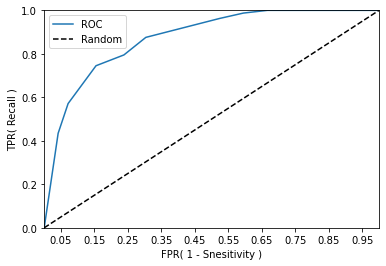

In [53]:
from sklearn.metrics import roc_curve

roc_curve_plot(y_test, svm_pred_proba_class_1)

In [54]:
from sklearn.metrics import roc_auc_score

pred_proba = svm.predict_proba(x_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC Score: ', roc_score)

ROC AUC Score:  0.8742051168293404


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=2)]: Done   2 out of   2 | elapsed:    0.0s finished
